In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

In [2]:
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
print('Training data shape:', X_train.shape)
print('Training labels shape:',y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


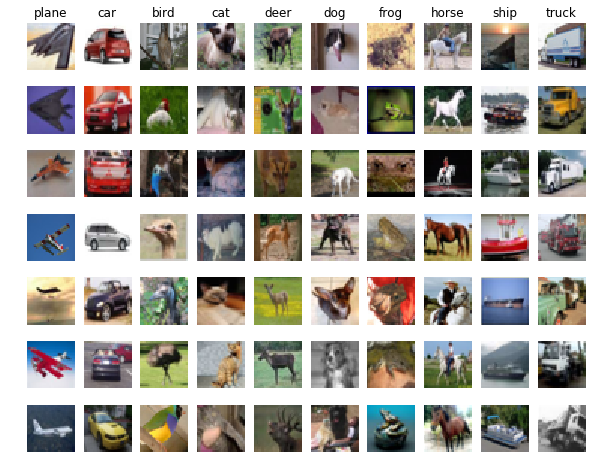

In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer','dog','frog','horse','ship','truck']
num_classes = len(classes)
samples_per_class = 7
for y,cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500
# 从49000-50000 作为验证集
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# 从0-49000  作为训练集
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# development集，是training的小子集
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


[ 130.64189796  135.98173469  132.47391837  130.05569388  135.34804082
  131.75402041  130.96055102  136.14328571  132.47636735  131.48467347]


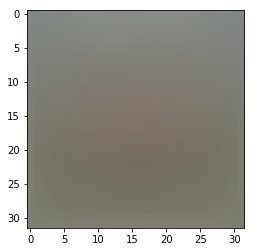

In [6]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
plt.show()

In [7]:
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [8]:
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [9]:
from cs231n.classifiers.linear_svm import svm_loss_naive
import time
W = np.random.randn(3073,10) * 0.0001
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print ('loss:%f' % (loss, ))

loss:9.529381


In [10]:
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)
# print (grad)
from cs231n.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
# ix = tuple([randrange(m) for m in x.shape]), 在W中随机找一个点(x,y)进行数字梯度计算
# 比较的是grad其中一个点的值，比较10次    中心插值公式
grad_numerical = grad_check_sparse(f, W, grad)

loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e-1)
f = lambda w:svm_loss_naive(w, X_dev, y_dev, 5e-1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

(692, 1)
numerical: 2.509163 analytic: 2.509163, relative error: 9.389293e-11
(1526, 2)
numerical: -8.243711 analytic: -8.243711, relative error: 2.502512e-11
(2988, 7)
numerical: -9.404329 analytic: -9.404329, relative error: 1.884178e-11
(2505, 5)
numerical: 12.472593 analytic: 12.472593, relative error: 3.089257e-11
(704, 0)
numerical: -49.724796 analytic: -49.724796, relative error: 7.425470e-12
(2770, 7)
numerical: -14.166990 analytic: -14.166990, relative error: 2.059607e-12
(92, 5)
numerical: 39.822740 analytic: 39.822740, relative error: 4.002461e-12
(1094, 8)
numerical: -38.173871 analytic: -38.173871, relative error: 5.223923e-12
(237, 4)
numerical: 22.698665 analytic: 22.698665, relative error: 3.011924e-12
(2434, 1)
numerical: 29.543313 analytic: 29.543313, relative error: 1.058413e-11
(1788, 3)
numerical: -11.948249 analytic: -11.948144, relative error: 4.380138e-06
(407, 2)
numerical: 7.883717 analytic: 7.883694, relative error: 1.513854e-06
(2484, 8)
numerical: 21.893313

**My Answer:** *由于max并非连续可微函数，所以存在在零界点时f(x+h)或f(x-h)改变了符号，最终求得的num_grad和any_grad互为相反数？*

In [11]:
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss: %e computer in %fs' % (loss_naive, toc-tic))

from cs231n.classifiers.linear_svm import svm_loss_vectorized
tic = time.time()
loss_vectorized, _ = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

print('difference: %f' % (loss_naive - loss_vectorized))

Naive loss: 9.529381e+00 computer in 0.193011s
Vectorized loss: 9.529381e+00 computed in 0.007000s
difference: 0.000000


In [12]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.00005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)


Naive loss and gradient: computed in 0.217012s
Vectorized loss and gradient: computed in 0.007000s
difference: 0.000000


In [13]:
from cs231n.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                     num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' %(toc-tic))

iteration 0 / 1500: loss 791.750163
iteration 100 / 1500: loss 773.020573
iteration 200 / 1500: loss 770.037750
iteration 300 / 1500: loss 767.576046
iteration 400 / 1500: loss 764.001729
iteration 500 / 1500: loss 761.170629
iteration 600 / 1500: loss 758.362016
iteration 700 / 1500: loss 756.288892
iteration 800 / 1500: loss 754.751835
iteration 900 / 1500: loss 752.377366
iteration 1000 / 1500: loss 750.652930
iteration 1100 / 1500: loss 749.232750
iteration 1200 / 1500: loss 747.112781
iteration 1300 / 1500: loss 746.511758
iteration 1400 / 1500: loss 744.802048
That took 10.579605s


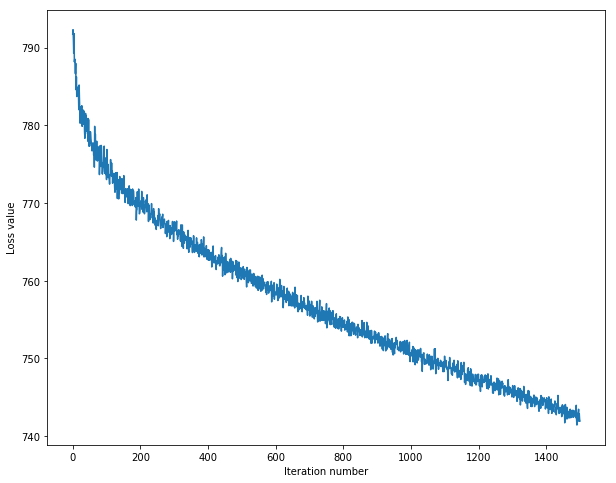

In [14]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [15]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred),))

training accuracy: 0.306204
validation accuracy: 0.310000


In [45]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]
results = {}  #(learning_rate, regularization_strength) : (training_accuracy, validation_accuracy
best_val =  -1
best_svm = None
#############################################
for learning_rate in np.arange(learning_rates[0],learning_rates[1], 1e-6):
    for regularization_strength in np.arange(regularization_strengths[0], regularization_strengths[1], 1e5):
        svm = LinearSVM()
        svm.train(X_train, y_train, learning_rate, regularization_strength, 
                  num_iters=5000, verbose=False)
        y_train_pred = svm.predict(X_train)
        training_accuracy = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val)
        validation_accuracy = np.mean(y_val == y_val_pred)
        results[(learning_rate, regularization_strength)] = (training_accuracy, validation_accuracy)
        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_svm = svm

In [46]:
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' %(
            lr, reg, train_accuracy,val_accuracy))
print('best validation accuracy achieved during cross-validation:%f' % best_val)

lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.345531 val accuracy: 0.335000
lr 1.100000e-06 reg 2.500000e+04 train accuracy: 0.392449 val accuracy: 0.379000
lr 2.100000e-06 reg 2.500000e+04 train accuracy: 0.359327 val accuracy: 0.315000
lr 3.100000e-06 reg 2.500000e+04 train accuracy: 0.378857 val accuracy: 0.350000
lr 4.100000e-06 reg 2.500000e+04 train accuracy: 0.338122 val accuracy: 0.319000
lr 5.100000e-06 reg 2.500000e+04 train accuracy: 0.330306 val accuracy: 0.330000
lr 6.100000e-06 reg 2.500000e+04 train accuracy: 0.370041 val accuracy: 0.331000
lr 7.100000e-06 reg 2.500000e+04 train accuracy: 0.341041 val accuracy: 0.305000
lr 8.100000e-06 reg 2.500000e+04 train accuracy: 0.274918 val accuracy: 0.265000
lr 9.100000e-06 reg 2.500000e+04 train accuracy: 0.291306 val accuracy: 0.276000
lr 1.010000e-05 reg 2.500000e+04 train accuracy: 0.303061 val accuracy: 0.292000
lr 1.110000e-05 reg 2.500000e+04 train accuracy: 0.319306 val accuracy: 0.311000
lr 1.210000e-05 reg 2.500000

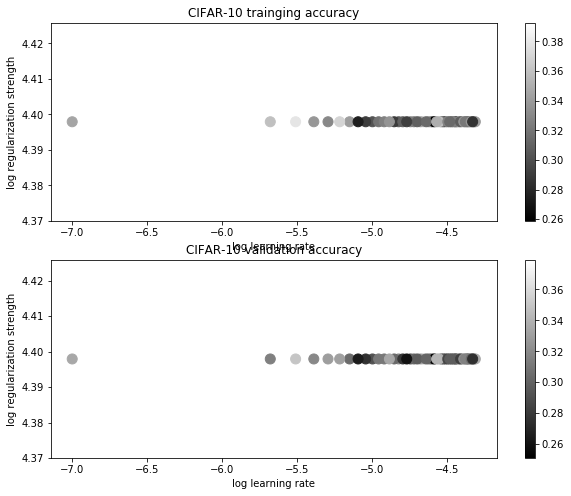

In [47]:
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2,1,1)
plt.scatter(x_scatter, y_scatter, marker_size, c = colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 trainging accuracy')

colors = [results[x][1] for x in results]
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()


In [48]:
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

linear SVM on raw pixels final test set accuracy: 0.345000


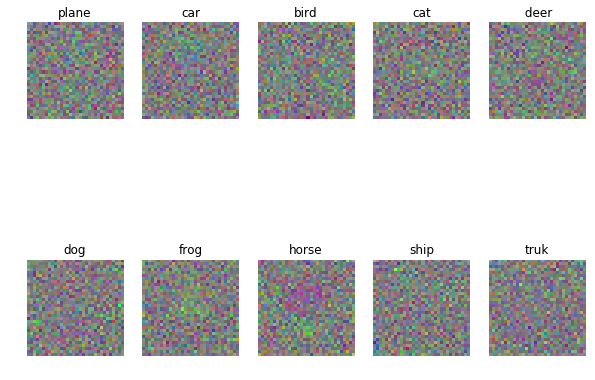

In [49]:
w = best_svm.W[:-1, :]
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat',' deer', 'dog', 'frog', 'horse', 'ship', 'truk']
for i in range(10):
    plt.subplot(2, 5, i+1)
    # 归一化操作
    wimg = 255.0 *  (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

**My answer:** *这些图具有相应分类的模糊的图案。该分类器可以学习到相应分类的有关颜色数值方面的特征，可能相同类别中所提供的训练样本各不相同，会提取到大多数所拥有的特征*